# Loading packages

In [310]:
# API KEY : EMwzuj0yDs1IN5AtUEuIZaXuo
# API SECRET KEY : zUHWsSCnlsALXdCGlKqJCc74btp8QqZvhbI168Ct0PQG0URNjn
# access token : 1097935670985789440-Y3ZfQCmEQMgffIIsSiUYUHU4q20Lkz
# BEARER TOKEN: AAAAAAAAAAAAAAAAAAAAAMoUMQEAAAAAVtBh9EJPa7gX9ZLst3doAfmCNDI%3DWhzKsqc8HL2ZHRTcaYfGCzGzDYTosp4XgQxLLYBJtqvz8sdhTX


#tweet library
if(!require("rtweet")) install.packages("rtweet"); library("rtweet")
if(!require("dplyr")) install.packages("dplyr"); library("dplyr")
library(data.table)
library(stopwords)
library(tm)
library(ggplot2)
library(dplyr)
library(tidyr)
for (i in c('SnowballC','slam','tm','Matrix','dplyr','tidytext',"ggplot2")){
  if (!require(i, character.only=TRUE)) install.packages(i, repos = "http://cran.us.r-project.org")
  require(i, character.only=TRUE)
}
install.packages("stopwords")
if (!require("udpipe")) install.packages("udpipe", quiet=TRUE) ; require("udpipe")

bearer_token = "AAAAAAAAAAAAAAAAAAAAAMoUMQEAAAAAVtBh9EJPa7gX9ZLst3doAfmCNDI%3DWhzKsqc8HL2ZHRTcaYfGCzGzDYTosp4XgQxLLYBJtqvz8sdhTX"

# access token
appname <- "TwitterAnalysis_MBDA"
consumer_key <- "EMwzuj0yDs1IN5AtUEuIZaXuo"
consumer_secret <- "zUHWsSCnlsALXdCGlKqJCc74btp8QqZvhbI168Ct0PQG0URNjn"
access_token <- "1097935670985789440-Y3ZfQCmEQMgffIIsSiUYUHU4q20Lkz"
access_secret <- "xKQQtBmn08ZjYhGFac6DdaVQMlDs8tO1oxRuclPduRfvP"

twitter_token <- create_token(
  app = appname,
  consumer_key = consumer_key,
  consumer_secret = consumer_secret,
  access_token = access_token,
  access_secret = access_secret,
  set_renv=FALSE)

library(httr)
library(jsonlite)

for (i in c('SnowballC','slam','tm','Matrix','tidytext','dplyr','hunspell','purrr','wordcloud','RWeka')){
  if (!require(i, character.only=TRUE)) install.packages(i, repos = "http://cran.us.r-project.org")
  require(i, character.only=TRUE)
}

if (!require("topicmodels")) install.packages("topicmodels", quiet=TRUE) ; require("topicmodels")
  

Warning message:
"package 'stopwords' is in use and will not be installed"Warning message:
"package 'httr' was built under R version 3.6.3"
Attaching package: 'httr'

The following object is masked from 'package:NLP':

    content


Attaching package: 'jsonlite'

The following object is masked from 'package:purrr':

    flatten

The following object is masked from 'package:rtweet':

    flatten

Loading required package: RWeka
Warning message:
"package 'RWeka' was built under R version 3.6.3"Error: package or namespace load failed for 'RWeka':
 .onLoad failed in loadNamespace() for 'rJava', details:
  call: fun(libname, pkgname)
  error: JAVA_HOME cannot be determined from the Registry


package 'RWeka' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rsmadja\AppData\Local\Temp\Rtmpsj9g5S\downloaded_packages


Loading required package: RWeka
Warning message:
"package 'RWeka' was built under R version 3.6.3"Error: package or namespace load failed for 'RWeka':
 .onLoad failed in loadNamespace() for 'rJava', details:
  call: fun(libname, pkgname)
  error: JAVA_HOME cannot be determined from the Registry


# 1. Data Collection

# a. Collect tweets from nytimes

We decided to colect tweets from the year 2020, for that we needed to define the dates and use the search full archive from the rtweet package.

Given that the developper account from twitter gives limited access to queries, we decided to export is as csv so that we don't need to run it everytime we open the notebook. The code above and all the code to collect some tweets is then frozen to avoid any issues. 

In [2]:
df_total<-read.csv("nytimes.csv")
df_total

user_id,status_id,created_at,screen_name,text,source,retweet_count,reply_count,is_retweet
807095,1.215418e+18,2020-01-09 23:40:06,nytimes,Evening Briefing: Here's what you need to know at the end of the day https://t.co/kiXXIkKUV8,SocialFlow,28,21,FALSE
807095,1.215413e+18,2020-01-09 23:20:06,nytimes,"Much will be written, in the coming days, about rifts in the royal family, or of a millennial prince rejecting the old-fashioned life offered to him. But for Prince Harry, the tabloid press was always the worm in the apple, writes @EllenBarryNYT. https://t.co/gNlmL0Cmxi",SocialFlow,68,39,FALSE
807095,1.215410e+18,2020-01-09 23:06:39,nytimes,Breaking News: The U.S. House voted to force President Trump to seek congressional approval for further military action against Iran. The measure still needs Senate approval. https://t.co/2X3EjJIKm5,SocialFlow,497,162,FALSE
807095,1.215408e+18,2020-01-09 23:00:19,nytimes,Here's a healthy sheet-pan dinner that comes together in just 20 minutes https://t.co/7wwR3aahsd,SocialFlow,36,10,FALSE
807095,1.215403e+18,2020-01-09 22:40:07,nytimes,"A teacher in Florida was arrested and charged with battery after a video showed him physically throwing a 14-year-old student out of class, authorities said on Wednesday https://t.co/v9ZLSe3mv9",SocialFlow,76,58,FALSE
807095,1.215402e+18,2020-01-09 22:36:51,nytimes,The Lehigh Valley in Penn. has done something a lot of other former industrial dynamos in the Northeast and Midwest have not been able to: engineer an economic boom. Here's how they did it and what it might mean for this swing state in the 2020 election. https://t.co/UbwvtjBfGJ,Twitter Web App,0,0,TRUE
807095,1.215398e+18,2020-01-09 22:20:04,nytimes,"In Opinion Afua Hirsch writes, ""Harry and Meghan’s act of leaving — two fingers up at the racism of the British establishment — might be the most meaningful act of royal leadership I’m ever likely to see."" https://t.co/fTXqz8G22H",SocialFlow,2002,420,FALSE
807095,1.215393e+18,2020-01-09 22:00:24,nytimes,"“Becoming a mother made me feel connected to my mom in a new way. I understood how much she loved me, because I loved my son that much,” writes Cassie Chambers for @NYTparenting. https://t.co/miQcWB3mI2",SocialFlow,24,4,FALSE
807095,1.215391e+18,2020-01-09 21:52:14,nytimes,"NEW from me &gt;&gt; “I wouldn’t want Bernie to lose New Hampshire, but if Yang doesn’t get a big enough turnout, that could impact the rest of his campaign nationwide,” Mr. Rhodes said, sounding slightly exasperated. “That’s why I’m torn!” https://t.co/E8m8Z5W6mv",Twitter Web App,0,0,TRUE
807095,1.215389e+18,2020-01-09 21:45:58,nytimes,"With so many options for this year's 52 Places to Go list, we had to ask: “Why this place, this year?” Our @nytimestravel editor @amyvirshup explains. https://t.co/9P5ycImuIj",Twitter Web App,26,9,FALSE


In [3]:
df_total$status_id[1]

[1] 1.215418e+18

api_key1 <- "j5BINM1gdM8bqSE7INFzI5XX2"
api_key_secret <- "1WAUqRr3Q9ZVMrKK201rcmWLQanpxjy1vbqLYtwGAYGJOLa6dE"
bearer_token1 <- "AAAAAAAAAAAAAAAAAAAAANApMQEAAAAAQPsX6gu%2B%2BR9JYeJDqIeJPG21lNs%3D1eE7f9FCSGmKJQSdzRyljXZ8k6JqBgumMHwsTrMQqmYhg3y5pb"
access_token1 <- "1097935670985789440-iYrHvLpHfPmk6bhKlV8bxbDxlk4cnl"
access_token_secret1 <-"T6jj9AQsMNHiSYJizPyklGhZdZg5BlsudPRm6cYIugwcM"


twitter_token1 <- create_token(
  app = "TwitterResponses",
  consumer_key = api_key1,
  consumer_secret = api_key_secret,
  access_token = access_token1,
  access_secret = access_token_secret1,
  set_renv=FALSE)

# b. Collect basic information about the account

In [4]:
#read the file
account_info <- read.csv("account_info.csv")
account_info

favourites_count,statuses_count,listed_count,friends_count,followers_count
18371,421202,207180,901,49158993


Here we have a general overview of the nytimes account.
With only 901 friends and more than 49M followers, this is a very popular account. 
It appears in many lists and is very active. 

# c. Collect all the tweets that include "#nytimes", "new york times", "nytimes", "#nyt"

In [2]:
#read the file
mentions <- read.csv("mentions.csv")

In [3]:
head(mentions)
nrow(mentions)

user_id,status_id,created_at,screen_name,text,source,retweet_count,reply_count,is_retweet
2.455553e+09,1.355882e+18,2021-01-31 14:12:56,narssicity,"Today I learned. As Stalin was starving over 3 million Ukrainians to death, the NYT was his main ally. The New York Times denied there was any famine in Ukraine. The NYT correspondent in Moscow got a Pulitzer for his reporting.",Twitter for iPhone,732,NA,TRUE
8.381292e+17,1.355882e+18,2021-01-31 14:12:52,fyre__storm,"@williamlegate ""Mr. Trump has insisted that the case is “simple” and has told advisers he could argue it himself and save the money on lawyers."" The New York Times: Trump Parts Ways With Five Lawyers Handling Impeachment Defense. https://t.co/3XnvASOh12",Twitter for iPhone,14,NA,TRUE
1.184479e+18,1.355882e+18,2021-01-31 14:12:44,BobMarley_2021,Proud Boys Charged With Conspiracy in Capitol Riot - The New York Times https://t.co/JydGsls9Kq,Twitter for iPhone,0,NA,FALSE
1.184479e+18,1.355385e+18,2021-01-30 05:17:20,BobMarley_2021,"After Capitol Riot, Republican Ties to Extremist Groups Are Under Scrutiny - The New York Times https://t.co/wYpRZ0A1aw",Twitter for iPhone,0,NA,FALSE
1.184479e+18,1.355381e+18,2021-01-30 05:01:47,BobMarley_2021,Proud Boys Charged With Conspiracy in Capitol Riot - The New York Times https://t.co/JydGsls9Kq,Twitter for iPhone,0,NA,FALSE
1.184479e+18,1.355386e+18,2021-01-30 05:24:31,BobMarley_2021,Body Camera Footage Shows Capitol Rioters Trampling Over Woman - The New York Times https://t.co/n5ZZ5nLxlf,Twitter for iPhone,0,NA,FALSE


[1] 29533

In [4]:
#Remove tweets that already occur in nytimes tweets, from the account itself
#No duplicates
mentions <- anti_join(mentions, df_total, by="status_id")
nrow(mentions)

ERROR: Error in anti_join(mentions, df_total, by = "status_id"): could not find function "anti_join"


# d. Collect information about followers and friends

In [5]:
#Read the file
lists_followers <- read.csv("lists_followers.csv")
lists_followers

Warning message in file(file, "rt"):
"cannot open file 'lists_followers.csv': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


The list of memberships of the followers is very low compared to the numbers of followers but we can see that the list are technology oriented and tends to be in spanish. It means that the public of nytimes is large

# 2. Data Preprocessing

# a. PREPROCESSING OF THE TABLE DF_TOTAL WITH THE TWEETS FROM THE ACCOUNT 'NYTIMES'

In [6]:
#Remove punctuation
df_total <- mutate(df_total, text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))
df_total

ERROR: Error in mutate(df_total, text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", : could not find function "mutate"


In [7]:
#tokenization
df_total <- df_total %>% unnest_tokens(output = "word",
                                                    input = text, 
                                                    token = "words", 
                                                    drop=FALSE,to_lower=TRUE)
nrow(df_total)

ERROR: Error in df_total %>% unnest_tokens(output = "word", input = text, token = "words", : could not find function "%>%"


In [8]:
#remove stopwords
df_total <- df_total %>% anti_join(get_stopwords())
nrow(df_total)

ERROR: Error in df_total %>% anti_join(get_stopwords()): could not find function "%>%"


In [9]:
#remove the word trump as we know it is very present in the newest tweets
stopwords = 'trump'    
x  = df_total$word        
x  =  removeWords(x,stopwords)   

df_total$word <- x     

ERROR: Error in eval(expr, envir, enclos): object 'df_total' not found


In [10]:
'trump' %in% df_total$word

ERROR: Error in "trump" %in% df_total$word: object 'df_total' not found


In [11]:
#create the document term matrix
df_total_dtm <- df_total %>% count(status_id,word)
head(df_total_dtm)

df_total_dtm_dtm <- df_total_dtm %>% cast_dtm(status_id,word,n,weighting = tm::weightTf)



ERROR: Error in df_total %>% count(status_id, word): could not find function "%>%"


In [12]:
findAssocs(df_total_dtm_dtm, terms = "country", corlimit = 0.10)

ERROR: Error in findAssocs(df_total_dtm_dtm, terms = "country", corlimit = 0.1): could not find function "findAssocs"


In [13]:
df_totalFreq <- df_total %>% group_by(word) %>% 
                  summarize(freq = n()) %>%
                  arrange(-freq)  

ERROR: Error in df_total %>% group_by(word) %>% summarize(freq = n()) %>% arrange(-freq): could not find function "%>%"


In [14]:
#get a wordcloud
wordcloud(df_totalFreq$word, df_totalFreq$freq,
          max.words=40,
          scale=c(3,1))

ERROR: Error in wordcloud(df_totalFreq$word, df_totalFreq$freq, max.words = 40, : could not find function "wordcloud"


The wordcloud above shows that the most used words are coronavirus without any surprise as well as president and pandemic

In [15]:
#dictionnary lookup
df_totalSentiment <- inner_join(df_total,get_sentiments("bing"))

head(df_totalSentiment)
nrow(df_totalSentiment)

ERROR: Error in inner_join(df_total, get_sentiments("bing")): could not find function "inner_join"


In [16]:
#aggregation of the sentiment table and the 10 most used words
#Those words are all positive. We conclude this is how nytimes tends to give hope in their tweet news
#But we will see withthe following analysis that this is not the case of the sentiment of the overall tweet
summarySentiment <- df_totalSentiment %>%  count(word,sentiment,sort=TRUE) %>%
                    group_by(sentiment) %>%
                    top_n(10) %>%  
                    arrange(n) %>%
                    as.data.frame(stringsAsFactors=FALSE)

head(summarySentiment)

ERROR: Error in df_totalSentiment %>% count(word, sentiment, sort = TRUE) %>% : could not find function "%>%"


In [17]:
#plot the positive and negative words
#We can clearly see that we have more negative words than positive. We will continue to analyze it to get the sentiment by tweet.
summarySentiment %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()

ERROR: Error in summarySentiment %>% ungroup() %>% mutate(word = reorder(word, : could not find function "%>%"


In [148]:
#calculation of the sentiment

statusSentiment <- df_totalSentiment %>%
                    count(status_id, sentiment) %>%               
                    pivot_wider(id_cols = status_id,names_from=sentiment,values_from=n, values_fill = 0) %>% 
                    mutate(sentiment = positive - negative)
  # note that we only have sentiment for 73 posts in this way, since the others are considered neutral


nrow(statusSentiment)
head(statusSentiment)

[1] 1709

status_id,negative,positive,sentiment
1.215025e+18,2,0,-2
1.215030e+18,1,0,-1
1.215033e+18,3,0,-3
1.215038e+18,3,0,-3
1.215040e+18,0,1,1
1.215045e+18,0,1,1


In [172]:
#Join the sentiment table and and the base table to create an averall table
join_nytweets <- df_total %>% left_join(statusSentiment,by="status_id")

#remove the na values
join_nytweets <- join_nytweets[!is.na(join_nytweets$sentiment),]

In [173]:
#convert the column created_at as date
join_nytweets$created_at <- as.POSIXct(join_nytweets$created_at,format="%Y-%m-%d")
#aggregate to get the sum of sentiment by day
join_nytweets <- join_nytweets %>% select(created_at, sentiment) %>% group_by(created_at) %>% summarize(mean = sum(sentiment))

join_nytweets 



`summarise()` ungrouping output (override with `.groups` argument)


ERROR: Error in inherits(x, "Date"): argument "x" is missing, with no default


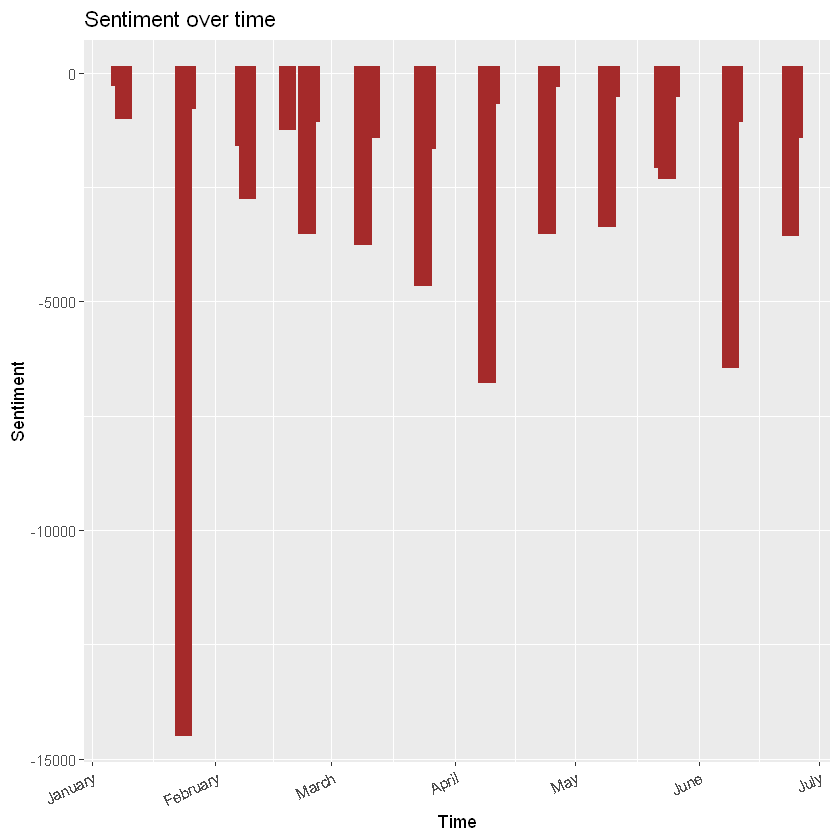

In [171]:
#PLOT sentiment over time




ggplot(join_nytweets %>% arrange(created_at), aes(x=created_at,y=mean)) + geom_col(color='brown', size=4) +labs(y = "Sentiment",x= "Time",title="Sentiment over time") +  scale_x_datetime(date_breaks = "1 month", date_labels = "%B")  +
  theme(axis.text.x = element_text(angle = 25, vjust = 1.0, hjust = 1.0))



# b. Preprocessing of the table 'mentions'

In [183]:
#remove punctuation
mentions <- mutate(mentions, text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))
mentions

user_id,status_id,created_at,screen_name,text,source,retweet_count,reply_count,is_retweet
2.455553e+09,1.355882e+18,2021-01-31 14:12:56,narssicity,Today I learned As Stalin was starving over million Ukrainians to death the NYT was his main ally The New York Times denied there was any famine in Ukraine The NYT correspondent in Moscow got a Pulitzer for his reporting,Twitter for iPhone,732,NA,TRUE
8.381292e+17,1.355882e+18,2021-01-31 14:12:52,fyre__storm,williamlegate Mr Trump has insisted that the case is “simple” and has told advisers he could argue it himself and save the money on lawyers The New York Times Trump Parts Ways With Five Lawyers Handling Impeachment Defense httpstcoXnvASOh,Twitter for iPhone,14,NA,TRUE
1.184479e+18,1.355882e+18,2021-01-31 14:12:44,BobMarley_2021,Proud Boys Charged With Conspiracy in Capitol Riot The New York Times httpstcoJydGslsKq,Twitter for iPhone,0,NA,FALSE
1.184479e+18,1.355385e+18,2021-01-30 05:17:20,BobMarley_2021,After Capitol Riot Republican Ties to Extremist Groups Are Under Scrutiny The New York Times httpstcowYpRZAaw,Twitter for iPhone,0,NA,FALSE
1.184479e+18,1.355381e+18,2021-01-30 05:01:47,BobMarley_2021,Proud Boys Charged With Conspiracy in Capitol Riot The New York Times httpstcoJydGslsKq,Twitter for iPhone,0,NA,FALSE
1.184479e+18,1.355386e+18,2021-01-30 05:24:31,BobMarley_2021,Body Camera Footage Shows Capitol Rioters Trampling Over Woman The New York Times httpstconZZnLxlf,Twitter for iPhone,0,NA,FALSE
1.184479e+18,1.355543e+18,2021-01-30 15:45:02,BobMarley_2021,Biden Hopes to Win GOP Support on Trillion Relief Package The New York Times httpstcodadfifhC,Twitter for iPhone,0,NA,FALSE
1.084488e+18,1.355882e+18,2021-01-31 14:12:31,TJTonyJoss1,In Framing Britney Spears the pop stars close friends and colleagues attempt to shine new light on her ongoing conservatorship httpstcoSjmVIsN,Twitter for iPhone,27,NA,TRUE
3.307439e+08,1.355882e+18,2021-01-31 14:12:16,briandavidearp,Opinion Facebook and the Surveillance Society The Other Coup The New York Times httpstcoCjVK,Buffer,0,NA,FALSE
3.959725e+07,1.355882e+18,2021-01-31 14:12:09,tcely,In Framing Britney Spears the pop stars close friends and colleagues attempt to shine new light on her ongoing conservatorship httpstcoSjmVIsN,Twitter for Android,27,NA,TRUE


In [184]:
#tokenize and put in lower cases
mentions <- mentions %>% unnest_tokens(output = "word", 
                                                    input = text, 
                                                    token = "words", 
                                                    drop=FALSE,to_lower=TRUE)
nrow(mentions)

[1] 824975

In [185]:
#Remove stopwords
mentions <- mentions %>% anti_join(get_stopwords()) 


Joining, by = "word"


In [186]:
stopwords = c('new', 'york', 'times', 'nyt', 'nytimes', 'the', 'trump', 'mr', "'s", 'via', 'th')  #Your stop words file
x  = mentions$word        #Company column data
x  =  removeWords(x,stopwords)     #Remove stopwords

mentions$word <- x  
nrow(mentions)

[1] 527568

In [187]:
#get the document term matrix
mentions_dtm <- mentions %>% count(status_id,word)
head(mentions_dtm)

status_id,word,n
1.344002e+18,,1
1.344002e+18,accredited,1
1.344002e+18,application,1
1.344002e+18,barronsonline,1
1.344002e+18,business,1
1.344002e+18,cbd,1


In [188]:
#get the weight
mentions_dtm <- mentions_dtm %>% cast_dtm(status_id,word,n,weighting = tm::weightTfIdf)

In [189]:
findAssocs(mentions_dtm, terms = "country", corlimit = 0.10)

$country
  httpstcoenkbgtei       unytclimateu        interactive              risks 
              0.45               0.45               0.39               0.36 
           climate    httpstcoqaodjlk    multinational’s              nimmo 
              0.25               0.25               0.25               0.25 
          controls         endangered         insistence            shifted 
              0.23               0.22               0.22               0.22 
          response          ominously       nonresidents          resources 
              0.21               0.21               0.20               0.20 
         meanwhile          excellent            bungled httpstcookoxiqkria 
              0.19               0.19               0.19               0.19 
          negative          targeting   httpstcodcjteucm             pulled 
              0.18               0.18               0.18               0.17 
           fastest          extremism              enter  httpstcoseattrobr 
              0.17               0.16               0.16               0.16 
        everything          interests                wmd           building 
              0.15               0.15               0.15               0.15 
               ccp            nosense        accumulated  httpstcownmlzimvf 
              0.15               0.15               0.15               0.15 
           promote        antagonists          uffjoseph httpstcotykzcugngm 
              0.14               0.14               0.14               0.14 
 httpstcoznyrcjjlu          operation   httpstcofbxqzxlw httpstcoyqnwfyrfxa 
              0.14               0.13               0.13               0.13 
         rightwing   pandemicresponse            defiant           vladimir 
              0.13               0.13               0.13               0.13 
              test          credulous             gospel            rollout 
              0.12               0.12               0.12               0.12 
          schuetze             potent        enforcement   httpstcockjwbuze 
              0.12               0.12               0.12               0.12 
            deafen      kathyleitzell             across               modi 
              0.12               0.12               0.11               0.11 
   httpstcotiuyuvr    httpstcotnugxvj             almost                  f 
              0.11               0.11               0.10               0.10 
     editorinchief              modis               sole  httpstcocxrbxsgzt 
              0.10               0.10               0.10               0.10 
            ballot   httpstcovrxmxaos            iarynam   httpstcoaoksduln 
              0.10               0.10               0.10               0.10 
 httpstcoxrgmgnjfh 
              0.10

In [190]:

mentions_freq <- mentions %>% group_by(word) %>% # for this, we need to have the sum over all documents
                  summarize(freq = n()) %>%
                  arrange(-freq)  

`summarise()` ungrouping output (override with `.groups` argument)


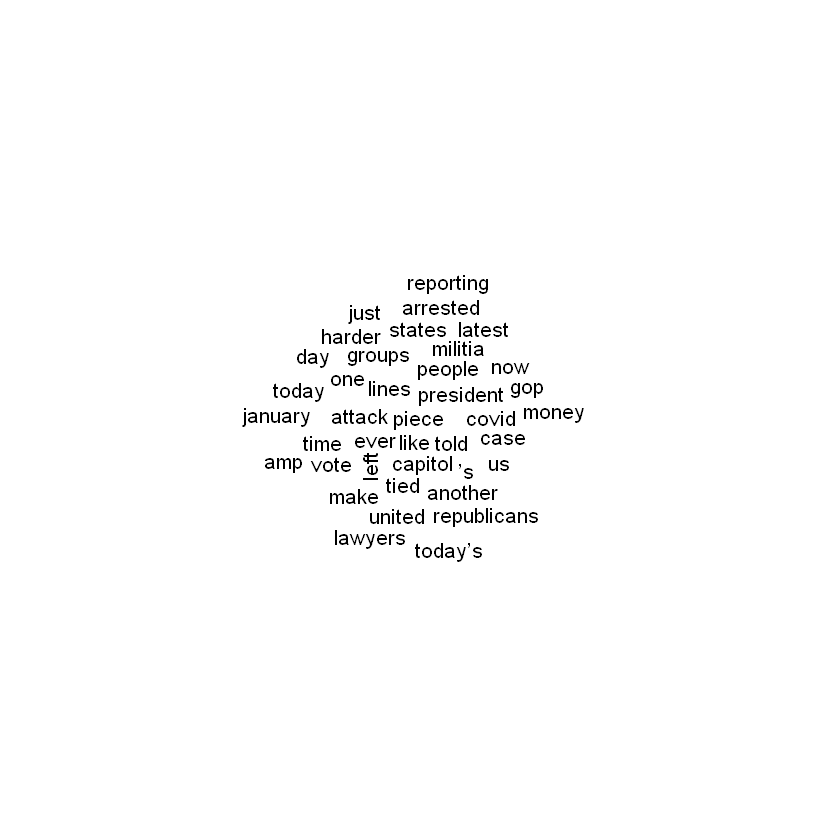

In [191]:
#create word cloud
wordcloud(mentions_freq$word, mentions_freq$freq,
          max.words=40,
          scale=c(3,1))

In [1]:
mentions_sentiment <- inner_join(mentions,get_sentiments("bing"))

head(mentions_sentiment)
nrow(mentions_sentiment)

ERROR: Error in inner_join(mentions, get_sentiments("bing")): could not find function "inner_join"


In [202]:
#aggregation of the sentiment table and the 10 most used words
#Those words are all positive
mentions_sentiment_count <- mentions_sentiment %>%  count(word,sentiment,sort=TRUE) %>%
                    group_by(sentiment) %>%
                    top_n(10) %>%  
                    arrange(n) %>%
                    as.data.frame(stringsAsFactors=FALSE)

head(mentions_sentiment_count)

Selecting by n


word,sentiment,n
safe,positive,285
work,positive,303
support,positive,340
better,positive,343
good,positive,365
great,positive,370


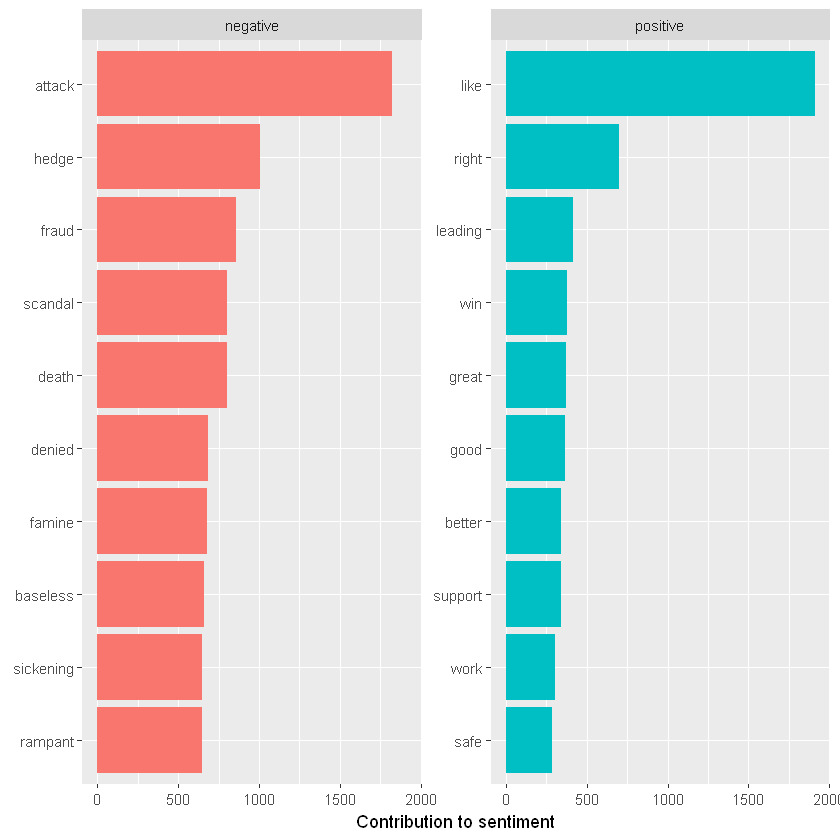

In [203]:
#Here, there is a more important balance betweet positive and negative tweets from those who mention the nyt
mentions_sentiment_count %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()



In [204]:
#get the sentiment of the tweets
statutmentions <- mentions_sentiment %>%
                    count(status_id, sentiment) %>%               
                    pivot_wider(id_cols = status_id, names_from=sentiment,values_from=n, values_fill = 0) %>%  
                    mutate(sentiment = positive - negative)


head(statutmentions)
nrow(statutmentions)

status_id,positive,negative,sentiment
1.344003e+18,2,0,2
1.344004e+18,2,0,2
1.344005e+18,2,0,2
1.344009e+18,1,0,1
1.344009e+18,1,0,1
1.344018e+18,1,1,0


[1] 22327

In [205]:
#number of neutral tweets
nrow(subset(statutmentions, sentiment==0)) 

[1] 2282

In [206]:
#number of positive tweets
nrow(subset(statutmentions, sentiment>0)) 

[1] 6818

In [207]:
#number of negative tweets
nrow(subset(statutmentions, sentiment<0)) 

[1] 13227

In total, this is again the negative who is the most important as nearly 60% of tweets are negative. 

In [278]:
#Join the sentiment table and and the base table to create an averall table
join_nytmentions <- mentions_sentiment %>% left_join(statutmentions,by="status_id")
str(join_nytmentions)

'data.frame':	47194 obs. of  14 variables:
 $ user_id      : num  2.46e+09 2.46e+09 2.46e+09 1.18e+18 1.18e+18 ...
 $ status_id    : num  1.36e+18 1.36e+18 1.36e+18 1.36e+18 1.36e+18 ...
 $ created_at   : Factor w/ 22361 levels "2020-12-29 19:26:43",..: 21184 21184 21184 21172 21172 3154 3009 3009 6707 6707 ...
 $ screen_name  : Factor w/ 22738 levels "____Corona_",..: 14841 14841 14841 2929 2929 2929 2929 2929 2929 2929 ...
 $ text         : chr  "Today I learned\n\nAs Stalin was starving over  million Ukrainians to death the NYT was his main ally\n\nThe Ne"| __truncated__ "Today I learned\n\nAs Stalin was starving over  million Ukrainians to death the NYT was his main ally\n\nThe Ne"| __truncated__ "Today I learned\n\nAs Stalin was starving over  million Ukrainians to death the NYT was his main ally\n\nThe Ne"| __truncated__ "Proud Boys Charged With Conspiracy in Capitol Riot  The New York Times httpstcoJydGslsKq" ...
 $ source       : Factor w/ 269 levels "","@klingerf_rt",..: 246 2

In [280]:
#convert the date as dates to plot it
join_nytmentions$created_at <- as.POSIXct(join_nytmentions$created_at,format="%Y-%m-%d")

In [281]:
#get the average sentiment by day
join_nytmentions <- join_nytmentions %>% select(created_at, sentiment.y) %>% group_by(created_at) %>% summarize(mean = mean(sentiment.y))
join_nytmentions

`summarise()` ungrouping output (override with `.groups` argument)


created_at,mean
2020-12-29,-0.4666667
2020-12-30,-1.2037037
2021-01-23,0.2164948
2021-01-24,-0.5167549
2021-01-25,-0.5535714
2021-01-26,-0.6060606
2021-01-27,-0.3548387
2021-01-28,-0.8960000
2021-01-29,-0.2510638
2021-01-30,-0.9905700


Warning message:
"Removed 2 rows containing missing values (position_stack)."Warning message:
"Removed 2 rows containing missing values (geom_col)."

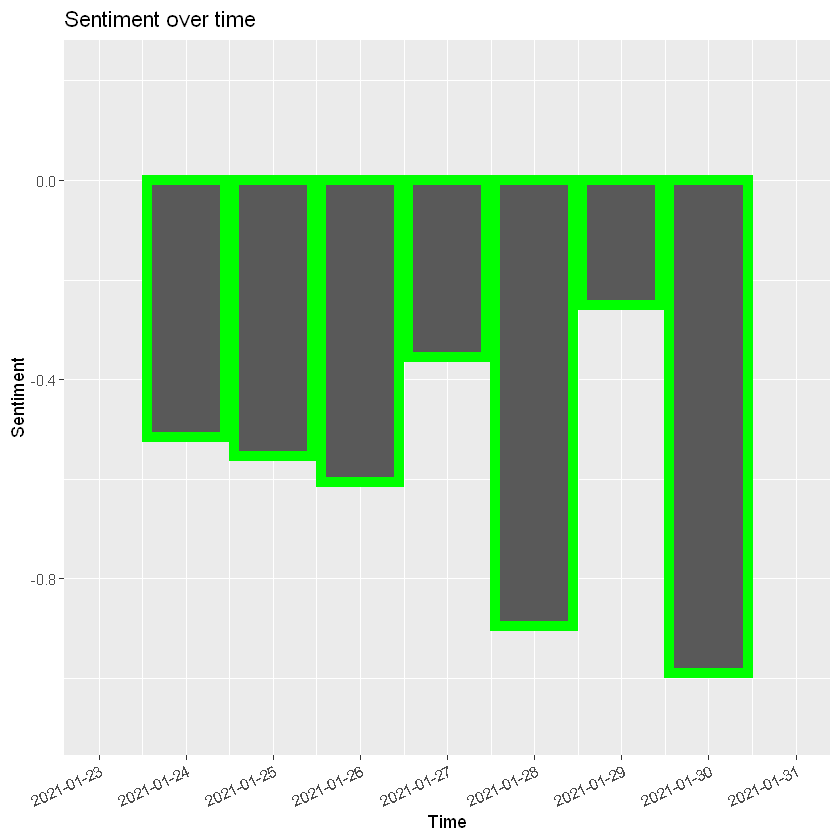

In [305]:
#Plot the sentiment over time of mentions tweets - our database is big but most of the tweets are from january so we decided to focus on the end of january to have an overview of the recent sentiment from the mentions
ggplot(join_nytmentions %>% arrange(created_at), aes(x=created_at,y=mean)) +
geom_col(color='green', size=3) +labs(y = "Sentiment",x= "Time",title="Sentiment over time") +
scale_x_datetime(date_breaks = "1 day", date_labels = "%Y-%m-%d",  limits = c(as.POSIXct("2021-01-23"),as.POSIXct("2021-01-31"))) +
theme(axis.text.x = element_text(angle = 25, vjust = 1.0, hjust = 1.0))

The average sentiment from the last 8 days is also negative, but not very stable over the days.

# Topic analysis on tweets from NYTIMES

We decided to perform a topic analysis to check about the topic of the news, so we did it only on the nytimes tweets and not on replies, to get an overview of the information this past year. 

In [4]:
df_total2 <- df_total
df_total2

user_id,status_id,created_at,screen_name,text,source,retweet_count,reply_count,is_retweet
807095,1.215418e+18,2020-01-09 23:40:06,nytimes,Evening Briefing: Here's what you need to know at the end of the day https://t.co/kiXXIkKUV8,SocialFlow,28,21,FALSE
807095,1.215413e+18,2020-01-09 23:20:06,nytimes,"Much will be written, in the coming days, about rifts in the royal family, or of a millennial prince rejecting the old-fashioned life offered to him. But for Prince Harry, the tabloid press was always the worm in the apple, writes @EllenBarryNYT. https://t.co/gNlmL0Cmxi",SocialFlow,68,39,FALSE
807095,1.215410e+18,2020-01-09 23:06:39,nytimes,Breaking News: The U.S. House voted to force President Trump to seek congressional approval for further military action against Iran. The measure still needs Senate approval. https://t.co/2X3EjJIKm5,SocialFlow,497,162,FALSE
807095,1.215408e+18,2020-01-09 23:00:19,nytimes,Here's a healthy sheet-pan dinner that comes together in just 20 minutes https://t.co/7wwR3aahsd,SocialFlow,36,10,FALSE
807095,1.215403e+18,2020-01-09 22:40:07,nytimes,"A teacher in Florida was arrested and charged with battery after a video showed him physically throwing a 14-year-old student out of class, authorities said on Wednesday https://t.co/v9ZLSe3mv9",SocialFlow,76,58,FALSE
807095,1.215402e+18,2020-01-09 22:36:51,nytimes,The Lehigh Valley in Penn. has done something a lot of other former industrial dynamos in the Northeast and Midwest have not been able to: engineer an economic boom. Here's how they did it and what it might mean for this swing state in the 2020 election. https://t.co/UbwvtjBfGJ,Twitter Web App,0,0,TRUE
807095,1.215398e+18,2020-01-09 22:20:04,nytimes,"In Opinion Afua Hirsch writes, ""Harry and Meghan’s act of leaving — two fingers up at the racism of the British establishment — might be the most meaningful act of royal leadership I’m ever likely to see."" https://t.co/fTXqz8G22H",SocialFlow,2002,420,FALSE
807095,1.215393e+18,2020-01-09 22:00:24,nytimes,"“Becoming a mother made me feel connected to my mom in a new way. I understood how much she loved me, because I loved my son that much,” writes Cassie Chambers for @NYTparenting. https://t.co/miQcWB3mI2",SocialFlow,24,4,FALSE
807095,1.215391e+18,2020-01-09 21:52:14,nytimes,"NEW from me &gt;&gt; “I wouldn’t want Bernie to lose New Hampshire, but if Yang doesn’t get a big enough turnout, that could impact the rest of his campaign nationwide,” Mr. Rhodes said, sounding slightly exasperated. “That’s why I’m torn!” https://t.co/E8m8Z5W6mv",Twitter Web App,0,0,TRUE
807095,1.215389e+18,2020-01-09 21:45:58,nytimes,"With so many options for this year's 52 Places to Go list, we had to ask: “Why this place, this year?” Our @nytimestravel editor @amyvirshup explains. https://t.co/9P5ycImuIj",Twitter Web App,26,9,FALSE


In [19]:
df_total_dtm_dtm

<<DocumentTermMatrix (documents: 2209, terms: 11814)>>
Non-/sparse entries: 39091/26058035
Sparsity           : 100%
Maximal term length: 67
Weighting          : term frequency (tf)

In [20]:
topics_nytimes <- LDA(df_total_dtm_dtm, k = 10,method="gibbs",control = list(nstart = 5, burnin = 2000, best = TRUE, seed = 2:6) )

In [21]:
topics_nytimes

A LDA_Gibbs topic model with 10 topics.

In [22]:
str(topics_nytimes)

Formal class 'LDA_Gibbs' [package "topicmodels"] with 16 slots
  ..@ seedwords      : NULL
  ..@ z              : int [1:61598] 6 9 7 8 9 2 5 8 5 9 ...
  ..@ alpha          : num 5
  ..@ call           : language LDA(x = df_total_dtm_dtm, k = 10, method = "gibbs", control = list(nstart = 5,      burnin = 2000, best = TRUE, seed = 2:6))
  ..@ Dim            : int [1:2] 2209 11814
  ..@ control        :Formal class 'LDA_Gibbscontrol' [package "topicmodels"] with 14 slots
  .. .. ..@ delta        : num 0.1
  .. .. ..@ iter         : int 4000
  .. .. ..@ thin         : int 2000
  .. .. ..@ burnin       : int 2000
  .. .. ..@ initialize   : chr "random"
  .. .. ..@ alpha        : num 5
  .. .. ..@ seed         : int [1:5] 2 3 4 5 6
  .. .. ..@ verbose      : int 0
  .. .. ..@ prefix       : chr "C:\\Users\\rsmadja\\AppData\\Local\\Temp\\RtmpIViljL\\file38fc54686ab1"
  .. .. ..@ save         : int 0
  .. .. ..@ nstart       : int 5
  .. .. ..@ best         : logi TRUE
  .. .. ..@ keep       

In [23]:
tweet_topics <- tidy(topics_nytimes, matrix = "beta")
head(tweet_topics)

topic,term,beta
1,bases,1.390743e-05
2,bases,1.365859e-05
3,bases,1.419769e-05
4,bases,1.364368e-05
5,bases,1.372797e-05
6,bases,1.487813e-04


topic,term,beta
1,days,0.011974299
1,state,0.010583556
1,public,0.009470961
1,democratic,0.008636515
1,still,0.007802069
1,announced,0.007662995
1,tuesday,0.006411326
1,minister,0.006133178
1,election,0.005855029
1,presidential,0.005437806


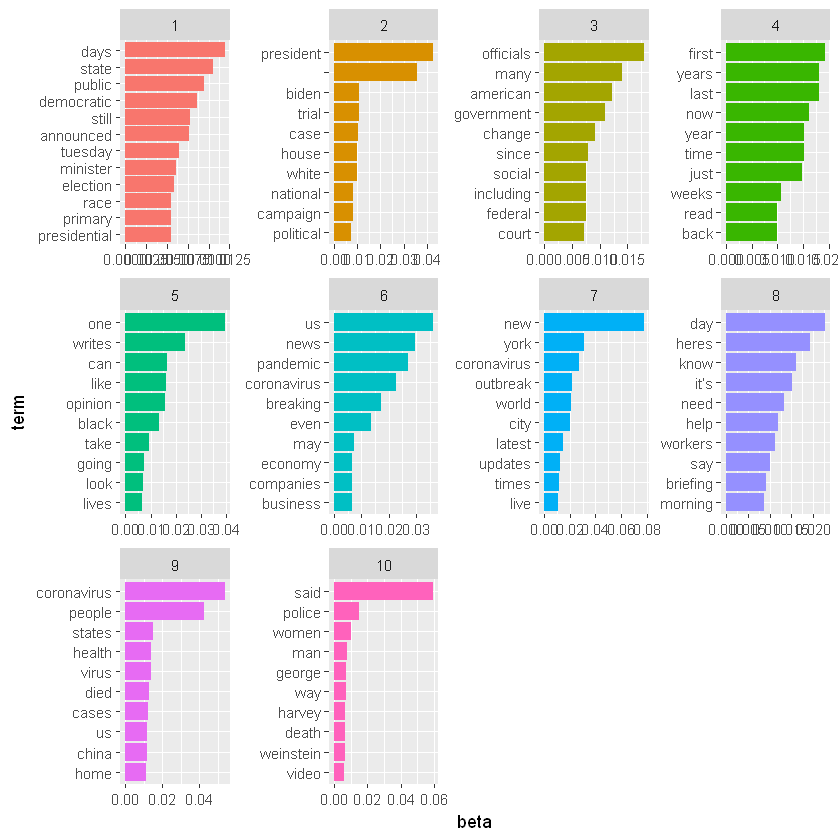

In [24]:
top_tweet_terms <- tweet_topics %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)
top_tweet_terms

top_tweet_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip() +
  scale_x_reordered()

In [ ]:
From the topic analysis we can link 1, 2 and 3 which are about politics and the us investiture of Joe Biden. 
The 4rth topic is not insightfull as it is only notions of time
The 5th topic gives not any theme also.
The 6, 7 and 9 topics are about the pandemic.
The 10th topics tends to cover the scandals like the one of George Floyd - videos from his criminal arrestation are viral - or Harvey Weistein, accused of rape,with the word women is also a recent scandal, 


The more important topics are:
- Covid
- Politics in US in general
- Harvey Weinstein
- George Floyd


Possible improvements for the topic analysis:
- select only adjectives and nouns
- discover new techniques to get a more exact number of topics 
- get rid of MORE non insighfull words